In [219]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### 0. Import Libraries

### 1. ETL (Extract, Transform, and Load) data

In [220]:
# Import insurance dataset
df = pd.read_csv("./University Students Monthly Expenses.csv")

# Check the first 8 rows of the dataset
df.head()

#Remove all rows with NULL values:
#df.fillna("unk", inplace = True)


,Study_year,Living,Scholarship,Part_time_job,Transporting,Drinks,Cosmetics_&_Self-care,Monthly_Subscription,Monthly_expenses_$
0,2.0,Home,No,No,No,No,Yes,No,150.0
1,3.0,Hostel,No,Yes,Motorcycle,No,Yes,Yes,220.0
2,2.0,Home,Yes,No,No,No,No,NaN,180.0
3,3.0,Hostel,No,No,Motorcycle,No,Yes,Yes,200.0
4,2.0,Home,No,No,Motorcycle,No,Yes,No,300.0


### 2. Data Cleaning

In [221]:
# # Use LabelEncoder to convert categorical features into numerical features, as
# models can't work with non-numerical values.
label_encoder = LabelEncoder()
df["Study_year"] = label_encoder.fit_transform(df["Study_year"])
df["Living"] = label_encoder.fit_transform(df["Living"])
df["Scholarship"] = label_encoder.fit_transform(df["Scholarship"])
df["Part_time_job"] = label_encoder.fit_transform(df["Part_time_job"])
df["Transporting"] = label_encoder.fit_transform(df["Transporting"])
df["Drinks"] = label_encoder.fit_transform(df["Drinks"])
df["Cosmetics_&_Self-care"] = label_encoder.fit_transform(df["Cosmetics_&_Self-care"])
df["Monthly_Subscription"] = label_encoder.fit_transform(df["Monthly_Subscription"])
df["Monthly_expenses_$"] = label_encoder.fit_transform(df["Monthly_expenses_$"])

### 3. Train-Test-Validation Split

In [222]:
# Select X and Y
# X is the input data, Y is the corresponding output data.
X = df[["Study_year", "Living", "Scholarship", "Part_time_job", "Transporting", "Drinks", "Cosmetics_&_Self-care", "Monthly_Subscription"]]
Y = df["Monthly_expenses_$"]

# Split data into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


In [223]:
# Scale data by normalizing the numerical data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### 4. Exploratory Data Analysis


In [224]:
df.sort_values(by="Monthly_expenses_$", ascending=False)

,Study_year,Living,Scholarship,Part_time_job,Transporting,Drinks,Cosmetics_&_Self-care,Monthly_Subscription,Monthly_expenses_$
84,0,0,0,0,2,0,1,2,12
60,1,2,1,0,3,0,1,0,12
13,1,0,0,1,3,2,2,0,12
92,1,0,0,1,3,2,2,0,12
51,1,1,0,1,0,0,2,1,12
...,...,...,...,...,...,...,...,...,...
69,1,0,0,0,1,0,1,0,0
43,1,0,0,0,1,0,1,0,0
91,1,0,0,0,1,0,1,0,0
12,1,0,0,0,2,0,1,0,0


### 6. Model Selection and Implementation

In [225]:
from sklearn import linear_model
from sklearn.linear_model import ElasticNet

# Build model
LinRegModel = LinearRegression()
LassoModel = linear_model.Lasso()
ElasticModel = ElasticNet()
# Train the model
LinRegModel.fit(X_train_scaled, y_train)
LassoModel.fit(X_train_scaled, y_train)
ElasticModel.fit(X_train_scaled, y_train)

# Predict against the testing set
y_pred_LinReg = LinRegModel.predict(X_test_scaled)
y_pred_Lasso = LassoModel.predict(X_test_scaled)
y_pred_Elastic = ElasticModel.predict(X_test_scaled)

### 7. Model Evaluation

In [226]:
# Evaluate the model.
mean_LinReg = np.mean(y_pred_LinReg, axis=0)
std_LinReg = np.std(y_pred_LinReg, axis=0)
mae_LinReg = mean_absolute_error(y_test, y_pred_LinReg)
mse_LinReg = mean_squared_error(y_test, y_pred_LinReg)
r2_LinReg = r2_score(y_test, y_pred_LinReg)

mean_Lasso = np.mean(y_pred_Lasso, axis=0)
std_Lasso = np.std(y_pred_Lasso, axis=0)
mae_Lasso = mean_absolute_error(y_test, y_pred_Lasso)
mse_Lasso = mean_squared_error(y_test, y_pred_Lasso)
r2_Lasso = r2_score(y_test, y_pred_Lasso)

mean_Elastic = np.mean(y_pred_Elastic, axis=0)
std_Elastic = np.std(y_pred_Elastic, axis=0)
mae_Elastic = mean_absolute_error(y_test, y_pred_Elastic)
mse_Elastic = mean_squared_error(y_test, y_pred_Elastic)
r2_Elastic = r2_score(y_test, y_pred_Elastic)

In [227]:
# Print the evaluation metrics
print("-----------------------------")
print("LinReg")
print(f"Average cost of insurance: {mean_LinReg}")
print(f"Standaraard Deviation: {std_LinReg}")
print(f"Mean Absolute Error MAE: {mae_LinReg}")
print(f"Mean Squared Error MSE: {mse_LinReg}")

print(f"R Squared R^2 score: {r2_LinReg}")

print("-----------------------------")
print("Lasso")
print(f"Average cost of insurance: {mean_Lasso}")
print(f"Standaraard Deviation: {std_Lasso}")
print(f"Mean Absolute Error MAE: {mae_Lasso}")
print(f"Mean Squared Error MSE: {mse_Lasso}")

print(f"R Squared R^2 score: {r2_Lasso}")
print("-----------------------------")
print("ElasticNet")
print(f"Average cost of insurance: {mean_Elastic}")
print(f"Standaraard Deviation: {std_Elastic}")
print(f"Mean Absolute Error MAE: {mae_Elastic}")
print(f"Mean Squared Error MSE: {mse_Elastic}")

print(f"R Squared R^2 score: {r2_Elastic}")

-----------------------------
LinReg
Average cost of insurance: 5.7704014135137305
Standaraard Deviation: 1.9533421619526492
Mean Absolute Error MAE: 2.940987073392713
Mean Squared Error MSE: 10.64128891200912
R Squared R^2 score: 0.3699236828415653
-----------------------------
Lasso
Average cost of insurance: 5.702380952380952
Standaraard Deviation: 8.881784197001252e-16
Mean Absolute Error MAE: 3.84297052154195
Mean Squared Error MSE: 16.89016439909297
R Squared R^2 score: -7.552363050500333e-05
-----------------------------
ElasticNet
Average cost of insurance: 5.702380952380952
Standaraard Deviation: 8.881784197001252e-16
Mean Absolute Error MAE: 3.84297052154195
Mean Squared Error MSE: 16.89016439909297
R Squared R^2 score: -7.552363050500333e-05


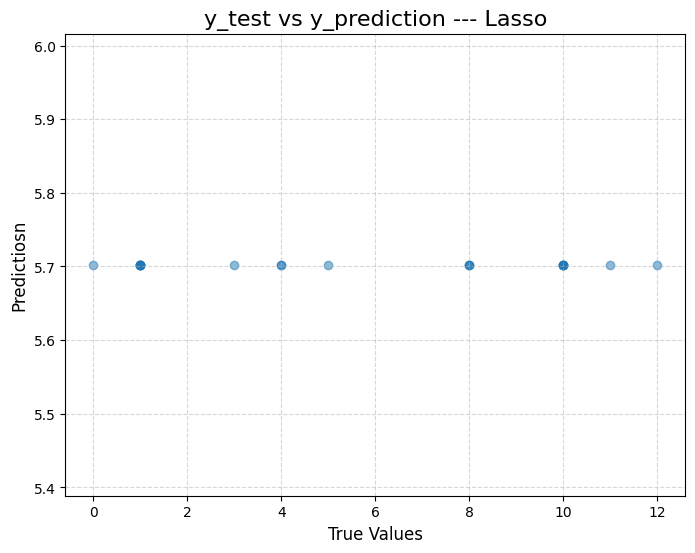

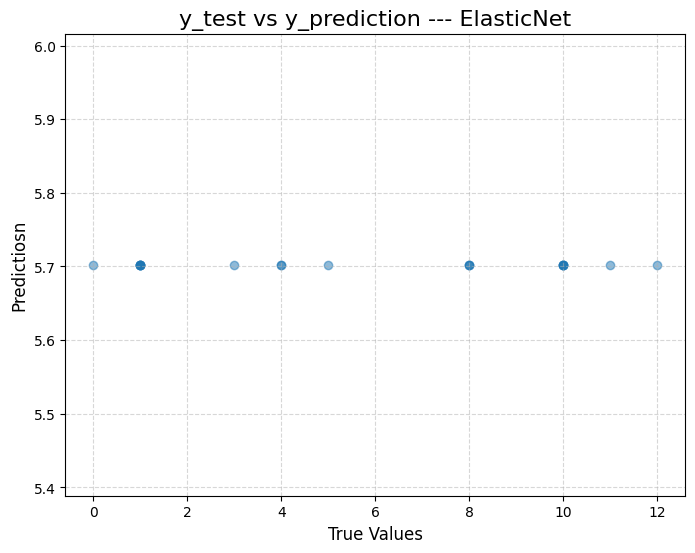

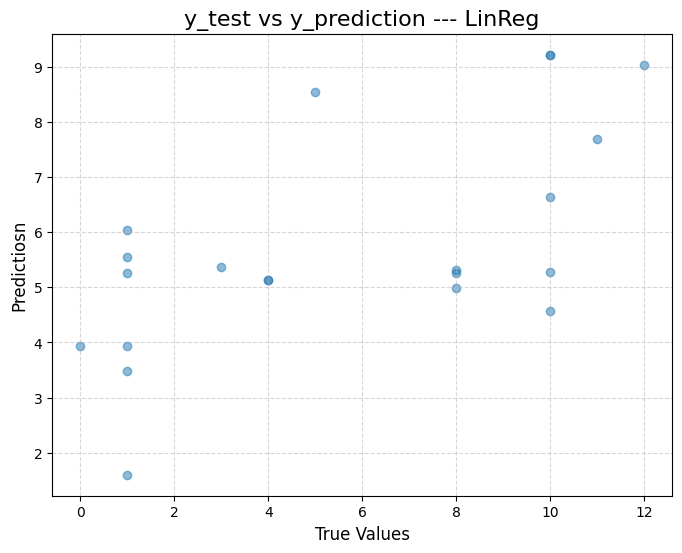

In [228]:
# Show the plot graph
def scatter(y_true, y_pred, title):
    plt.figure(figsize=(8,6))
    plt.scatter(y_true, y_pred, alpha =0.5)
    plt.title(title, fontsize=16)
    plt.xlabel("True Values", fontsize=12)
    plt.ylabel("Predictiosn", fontsize=12)
    plt.grid(True, linestyle="--", alpha = 0.5)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

scatter(y_test, y_pred_Lasso, "y_test vs y_prediction --- Lasso")
scatter(y_test, y_pred_Elastic, "y_test vs y_prediction --- ElasticNet")
scatter(y_test, y_pred_LinReg, "y_test vs y_prediction --- LinReg")

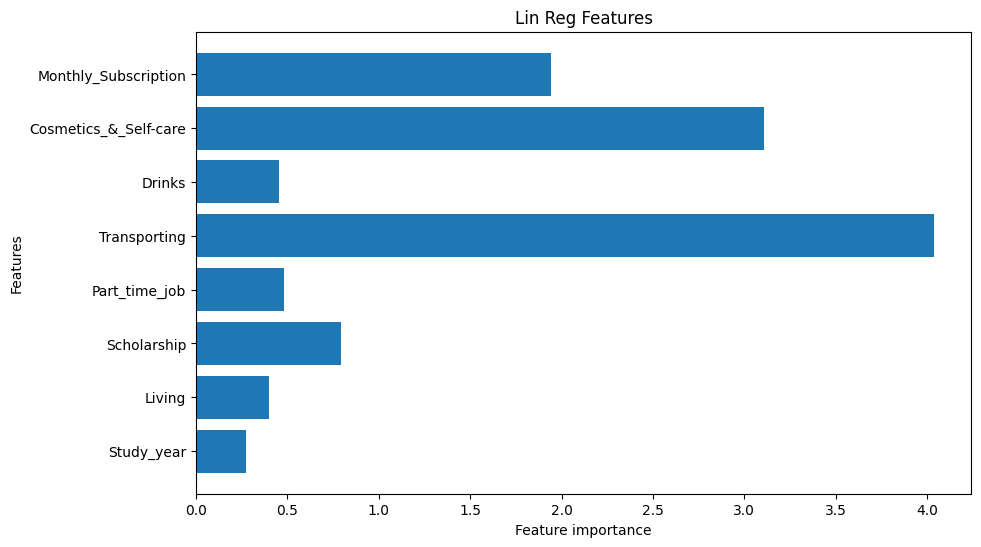

In [229]:
# 7.1

feature_importance = abs(LinRegModel.coef_)
feature_names = ["Study_year", "Living", "Scholarship", "Part_time_job", "Transporting", "Drinks", "Cosmetics_&_Self-care", "Monthly_Subscription"]
plt.figure(figsize=(10,6))
plt.barh(feature_names, feature_importance)
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.title("Lin Reg Features")

plt.show()

In [230]:
# Job Lib Dump

model = LinearRegression()
model.fit(X_train, y_train)

Score = model.score(X_test, y_test)
print("The score of the model is:", Score)

predictions = model.predict(X_test)
print("The predicted monthly expenses are:", predictions)

The score of the model is: 0.37765468109469236
The predicted monthly expenses are: [1.55504321 5.28386688 6.60875692 5.19235209 8.95294594 5.19235209
 8.29683713 4.98793961 7.64930775 3.91632574 5.48059361 8.81667095
 8.95294594 3.25286091 5.10290812 5.26254133 5.79306953 5.33067882
 3.91632574 4.49455955 5.10290812]
